# Radiologi Digital

**Rio Agustian Gilang Fernando, Fisika**

**FMIPA Universitas Negeri Semarang**


## 1. Menampilkan Citra

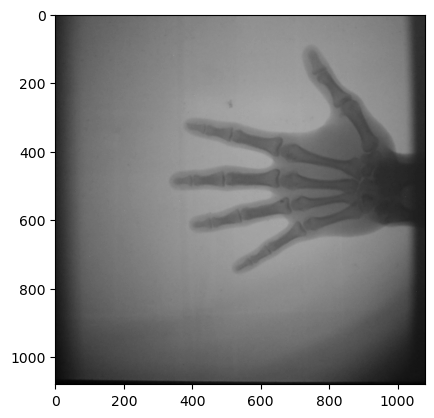

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

pth = r"C:\Users\Rio Agustian\Documents\S1 FISIKA\INSTRUMENTASI_MEDIS\hand.png"
img = cv.imread(pth, 0)
plt.imshow(img, cmap="gray")
plt.show()

Citra dibaca dari file komputer dengan menggunakan bantuan fungsi imread dari library OpenCV. Untuk menampilkan citra, digunakan fungsi imshow dari matplotlib.pyplot. Dapat dilihat bahwa citra yang digunakan merupakan hasil dari radiografi sinar x telapak tangan manusia.

## 2. Menampilkan Histogram Citra

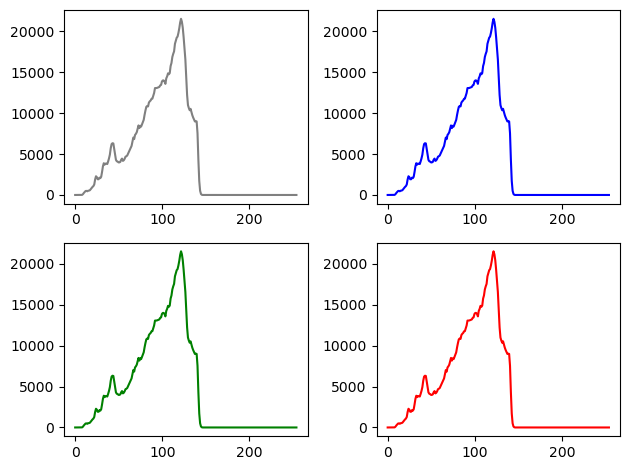

In [2]:
img_gry = cv.imread(pth, 0) # Ini membaca citra dalam format grayscale
img_bgr = cv.imread(pth, 1) # Ini membaca citra dalam format BGR

img_b = img_bgr[..., 0] # Piksel biru
img_g = img_bgr[..., 1] # Piksel hijau
img_r = img_bgr[..., 2] # Piksel merah

# Menghitung histogram dengan Numpy
hist_gry, bins_gry = np.histogram(img_gry, bins=256, range=[0, 255]) 
hist_b,   bins_b   = np.histogram(img_b,   bins=256, range=[0, 255])
hist_g,   bins_g   = np.histogram(img_g,   bins=256, range=[0, 255])
hist_r,   bins_r   = np.histogram(img_r,   bins=256, range=[0, 255])

# Plot histogram
plt.subplot(221)
plt.plot(bins_gry[:-1], hist_gry, c="gray", label="Gray")\

plt.subplot(222)
plt.plot(bins_b[:-1], hist_b, c="blue", label="Blue")

plt.subplot(223)
plt.plot(bins_g[:-1], hist_g, c="green", label="Green")

plt.subplot(224)
plt.plot(bins_r[:-1], hist_r, c="red", label="Red")

plt.tight_layout()
plt.show()

Histogram untuk piksel biru, hijau, dan merah sama dengan hasil histogram grayscale karena citra yang dipakai berwarna hitam-putih. Sehingga, tidak ada informasi warna RGB pada citra tersebut. Ini membuat nilai dari RGB sama dengan nilai grayscale.

## 3. Crop Citra

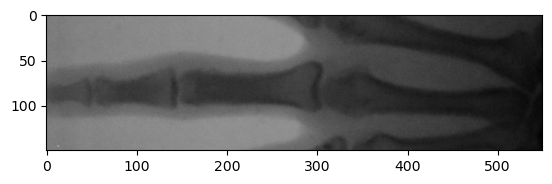

In [3]:
crop_img = img[400:550, 350:900]
plt.imshow(crop_img, cmap="gray")
plt.show()

Cropping dilakukan dengan metode slicing. Piksel citra diambil dari kolom 350 sampai 900 dan dengan baris 400 sampai 550 saja. Citra hasil crop merupakan tulang jari tengah.

## 4. Region of Interest

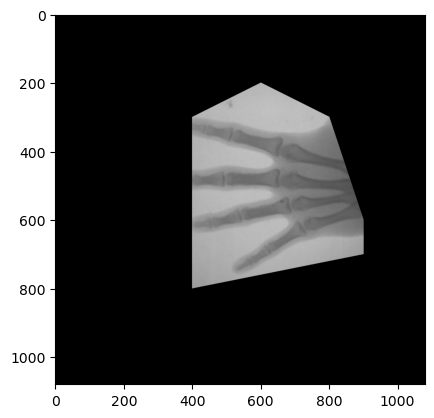

In [4]:
# Menentukan titik-titik untuk ROI polygon
titik = np.array([[(400, 300), (600, 200), (800, 300), (900, 600),
                  (900, 700), (400,800)]])

# Membuat mask dari ROI polygon
mask = np.zeros_like(img)
mask = cv.fillPoly(mask, titik, (255, 255, 255))

# Menampilkan gambar dengan ROI polygon
roi_img = cv.bitwise_and(img, mask)

plt.imshow(roi_img, cmap="gray")
plt.show()

Dengan menggunakan teknik ini, citra dapat diamati pada dearah tertentu saja. Bentuk ini dapat berupa polygon, tidak harus rectangular, sesuai dengan titik-titik yang dipilih. 

## 5. FFT

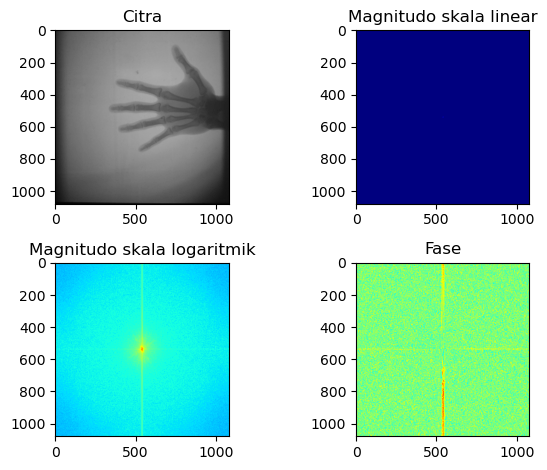

In [5]:
# Mengubah tipe data citra ke float32
img_ =  np.float32(img)

# Melakukakan FFT dan pergeseran nol terpusat
dft = cv.dft(img_, flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Menghitung fase spektrum hasil FFT
fase = cv.phase(dft_shift[:,:,0], dft_shift[:,:,1], angleInDegrees=True)

# Magnitude
mag = cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])

# Normalisasi magnitude pada rentang 0-255
mag_norm = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)

# Ubah format ke uint8
mag_uint8 = mag_norm.astype(np.uint8)

# Magnitude skala logaritmik
mag_log = np.zeros(mag.shape, dtype=mag.dtype)
mag_log_norm = cv.normalize(cv.log(1+mag), mag_log, 0, 255, cv.NORM_MINMAX)
mag_log_uint8 = mag_log_norm.astype(np.uint8)

plt.subplot(221)
plt.imshow(img, cmap="gray")
plt.title("Citra")

plt.subplot(222)
plt.imshow(mag_uint8, cmap="jet")
plt.title("Magnitudo skala linear")

plt.subplot(223)
plt.imshow(mag_log_uint8, cmap="jet")
plt.title("Magnitudo skala logaritmik")

plt.subplot(224)
plt.imshow(fase, cmap="jet")
plt.title("Fase")
plt.tight_layout()
plt.show()

FFT mengubah sinyal dari domain spasial menjadi domain frekuensi. Fungsi dari FFT salah satunya digunakan dalam proses filtering. Pada plot di atas, magnitudo dibuat dalam skala logaritmik agar lebih mudah dianalisis. 

## 6. Dilasi

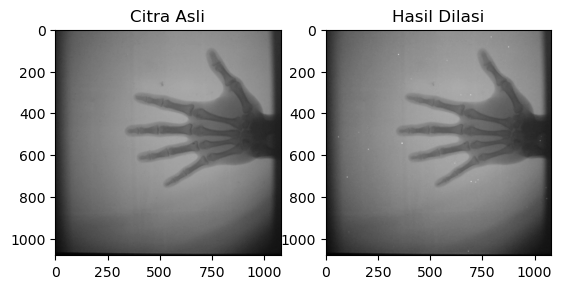

In [6]:
# Membuat kernel untuk dilasi
ker = np.ones((5,5),np.uint8)

# Melakukan dilasi pada citra
dil = cv.dilate(img, ker, iterations = 1)

# Menampilkan citra asli dan hasil dilasi
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Citra Asli')

plt.subplot(122)
plt.imshow(dil, cmap = 'gray')
plt.title('Hasil Dilasi');

Morfologi dilasi adalah salah satu teknik dalam pengolahan citra yang digunakan untuk memperbesar atau memperluas ukuran objek pada citra. Teknik ini dilakukan dengan menggeser suatu elemen struktur atau kernel pada seluruh citra, dan menambahkan nilai piksel yang berada di bawah elemen struktur ke dalam piksel pusat elemen tersebut.

## 7. Erosi

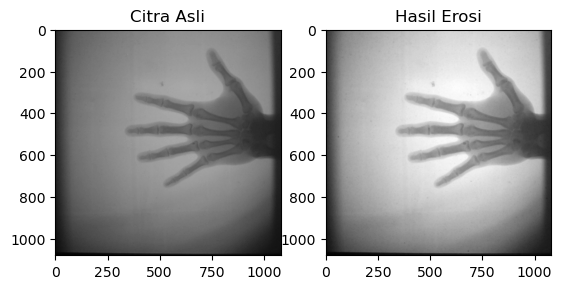

In [27]:
# Membuat kernel untuk dilasi
ker = np.ones((5,5),np.uint8)

# Melakukan dilasi pada citra
er = cv.erode(img, ker, iterations = 1)

# Menampilkan citra asli dan hasil dilasi
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Citra Asli')

plt.subplot(122)
plt.imshow(er, cmap = 'gray')
plt.title('Hasil Erosi');

Morfologi erosi adalah salah satu teknik dalam pengolahan citra yang digunakan untuk menyusutkan atau mengurangi ukuran objek pada citra. Teknik ini dilakukan dengan menggeser suatu elemen struktur atau kernel pada seluruh citra, dan menghilangkan piksel yang tidak memenuhi kriteria tertentu pada piksel pusat elemen tersebut.

## 8. Blurring

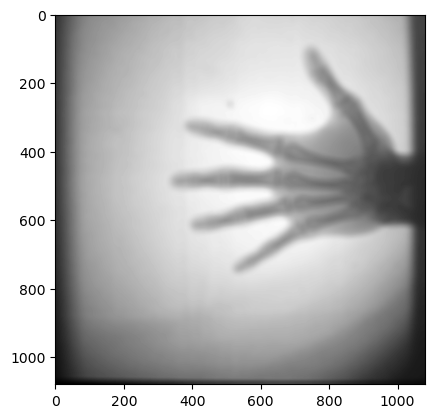

In [9]:
blur = cv.GaussianBlur(img, (21,21), 200)
plt.imshow(blur, cmap="gray")
plt.show()

Gaussian Filtering adalah teknik pengolahan citra yang digunakan untuk menghaluskan atau mengurangi noise pada citra dengan cara menerapkan kernel Gaussian pada citra. Tampak bahwa citra sekarang menjadi lebih kabur.

## 9. Deteksi Tepi

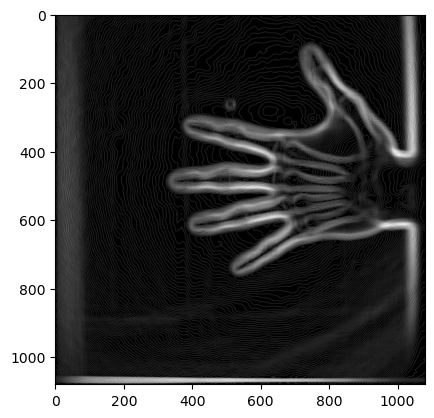

In [25]:
sx = cv.Sobel(blur, cv.CV_64F, 1, 0, ksize=3)
sy = cv.Sobel(blur, cv.CV_64F, 0, 1, ksize=3)

sx2 = np.square(sx)
sy2 = np.square(sy)
amp = np.sqrt(cv.add(sx2, sy2))

plt.imshow(amp, cmap="gray");
plt.show()

Tepi citra terjadi karena ada perubahan nilai keabuan piksel yang cukup besar pada jarak yang sempit. Algoritma deteksi tepi didasari oleh informasi ini. Pada deteksi tepi dengan filter sobel, digunakan 2 kernel. Filter Sobel horizontal digunakan untuk mendeteksi tepi yang berarah horizontal, sementara filter Sobel vertikal digunakan untuk mendeteksi tepi yang berarah vertikal. Nanti, hasil akhirnya merupakan magnitude dari keduanya.


## 10. Thresholding

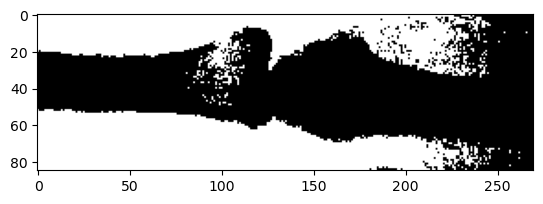

In [24]:
crop_img = img[445:530, 530:800]
ret, thresh = cv.threshold(crop_img, 90, 255, cv.THRESH_BINARY)
plt.imshow(thresh, cmap="gray")
plt.show()

Thresholding adalah teknik pengolahan citra yang digunakan untuk mengubah citra menjadi citra biner dengan membagi piksel-piksel menjadi dua kelas, yaitu piksel yang bernilai di atas atau di bawah suatu ambang batas tertentu. Misal, pada kode berikut, piksel akan diubah menjadi 0 apabila nilainya kurang dari sama dengan 90, dan diubah menjadi 255 apabila nilainya lebih dari 90.